In [1]:
import csv
import numpy as np
import copy
with open("prem.csv",'r',encoding="utf8") as file:
    data = list(csv.reader(file,delimiter=","))
    leaguedata = np.array(data)
with open("matches.csv", 'r',encoding="utf8") as file:
      #  reader = csv.reader(file)
    sample_data = list(csv.reader(file, delimiter=","))
    matchdata = np.array(sample_data)
matrixm =  [ [] for _ in range(len(leaguedata)+1) ]
matrixm[0].append(0)
features = [0,1,5,6]
listi = [ [] for _ in range(len(leaguedata)-1) ]
dicti = {}
vindex = 0
names = []
for a in range(len(leaguedata)-1):
    for b in features:
        listi[a].append(leaguedata[a+1][b])
        if b == 1:
            matrixm[0].append(leaguedata[a+1][b])
            matrixm[a+1].append(leaguedata[a+1][b])
            dicti.update({leaguedata[a+1][b]:int(leaguedata[a+1][b-1])})
            names.append(leaguedata[a+1][b])
for z in range(len(leaguedata)):
    for t in range(len(leaguedata)-1):
        matrixm[z+1].append(0)
#print(dicti)
for b in matchdata[1:]:
    home = b[4]
    away = b[8]
    try:
        if b[6][0] > b[6][-1]:
            matrixm[dicti[away]][dicti[home]] += 1
        if b[6][0] < b[6][-1]:
            matrixm[dicti[home]][dicti[away]] += 1
        if b[6][0] == b[6][-1]:
            matrixm[dicti[home]][dicti[away]] += .5
            matrixm[dicti[away]][dicti[home]] += .5
    except:
        continue
scores = copy.deepcopy(matrixm)
for v in range(len(scores)-1):
    scores[v+1].pop(0)
scores.pop(0)
scores.pop()

scores = np.array(scores)
corre = np.corrcoef(scores,rowvar = False)
for g in range(len(corre)):
    corre[g][g] = 0
print(corre)
lists =  [ [] for _ in range(len(leaguedata)) ]
lists2 =  [ [] for _ in range(len(leaguedata)) ]
for t in range(20):
    indexes = np.argsort(corre[t][:])[-3:]
    lists[t].append(names[t])
    #print(indexes)
    for u in indexes:
        lists[t].append(names[u])
        lists[t].append(corre[t][u])
    indexes = np.argsort(corre[t][:])[:4]
    lists2[t].append(names[t])
    #print(indexes)
    for u in indexes:
        if names[u] != lists2[t][0]:
            lists2[t].append(names[u])
            lists2[t].append(corre[t][u])

print(lists)
print(lists2)
        
        
#relating top scorers

[[ 0.          0.27252747  0.14378029  0.13407035  0.12058018  0.25625459
   0.37256004 -0.09733518  0.34987695  0.13068928  0.45072698  0.49821747
   0.14575501  0.11298876  0.58630353  0.05359119  0.56089478  0.16455529
   0.07691874  0.10930997]
 [ 0.27252747  0.         -0.15280442  0.20204299  0.07482317  0.24502513
   0.27246603  0.0258853   0.16600967 -0.25798178 -0.10554532  0.2353397
  -0.03647522  0.15914424  0.1579945   0.43112399 -0.07622331 -0.26872211
   0.34209346  0.32738217]
 [ 0.14378029 -0.15280442  0.          0.04265875  0.12058018  0.2313755
   0.20623859  0.19340626 -0.17292769  0.41756819  0.04684976  0.03246176
   0.13285634  0.1757603  -0.16536766 -0.21436477  0.08091147 -0.09318191
  -0.2044913  -0.35916133]
 [ 0.13407035  0.20204299  0.04265875  0.          0.0206754   0.10792771
   0.16939973  0.37670977  0.29329423 -0.29459332 -0.20110552  0.34074141
   0.06811987  0.09471602  0.33395808  0.32219167 -0.17071541  0.10470381
  -0.12030895  0.09572289]
 [ 0.1

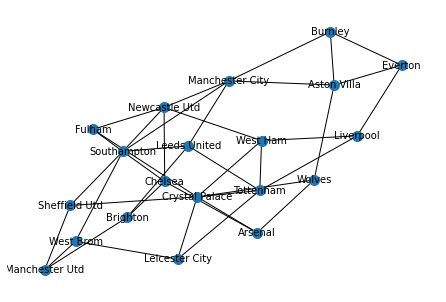

In [2]:

# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
 
g = nx.Graph()

for t in range(20):
    for h in [-2,-4,-6]:
        g.add_edge(names[t], names[dicti[lists[t][h]]-1])
nx.draw(g, with_labels = True,node_size = 100,font_size = 10)
plt.savefig("clubs.png")

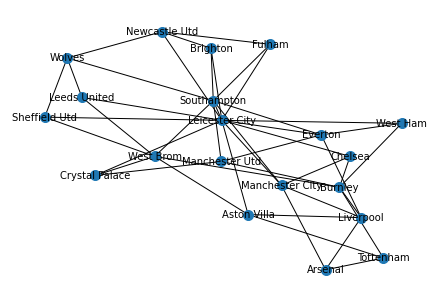

In [11]:
f = nx.Graph()
for t in range(20):
    for h in [-2,-4,-6]:
        f.add_edge(names[t], names[dicti[lists2[t][h]]-1])
nx.draw(f, with_labels = True,node_size = 100,font_size = 10)
plt.savefig("clubs2.png")

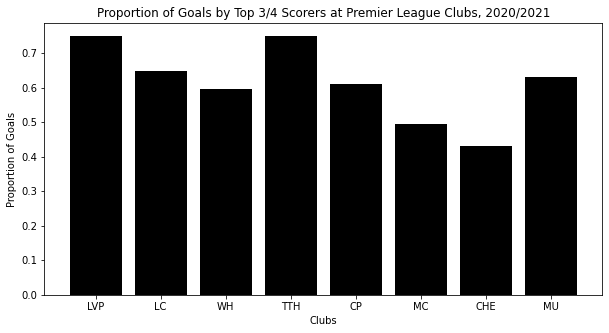

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'LVP':51/68, 'LC':44/68, 'WH':37/62,
        'TTH':51/68,'CP': 25/41, 'MC':41/83,"CHE":25/58,"MU":46/73}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='black',
        width = 0.8)
 
plt.xlabel("Clubs")
plt.ylabel("Proportion of Goals")
plt.title("Proportion of Goals by Top 3/4 Scorers at Premier League Clubs, 2020/2021")
plt.show()

[ 4.44226571  2.01410567  0.46214832  1.92020947  4.02073491  3.71951512
  5.03695344  2.4508582   3.26730949  1.00530222  2.19551352  1.9846038
  2.42135413  4.08325157  4.50317766 -1.05721471  2.11225797  1.64935579
  1.08598635  1.35363568]
{'Manchester City': 4.442265713049611, 'Manchester Utd': 2.01410566587595, 'Liverpool': 0.462148315104543, 'Chelsea': 1.920209473142535, 'Leicester City': 4.020734909905996, 'West Ham': 3.7195151205727406, 'Tottenham': 5.036953437676835, 'Arsenal': 2.450858196271367, 'Leeds United': 3.2673094917015137, 'Everton': 1.0053022167581687, 'Aston Villa': 2.1955135162822144, 'Newcastle Utd': 1.9846037962269194, 'Wolves': 2.4213541302808506, 'Crystal Palace': 4.083251568506687, 'Southampton': 4.503177660502033, 'Brighton': -1.057214705051926, 'Burnley': 2.1122579663437757, 'Fulham': 1.6493557922808928, 'West Brom': 1.0859863534323775, 'Sheffield Utd': 1.3536356817289104}
{'Brighton': -1.057214705051926, 'Liverpool': 0.462148315104543, 'Everton': 1.0053022

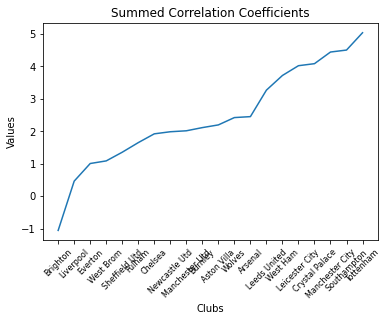

In [5]:
corrsums = np.sum(corre,axis = 0)
print(corrsums)
indexi = 0
names2 = copy.deepcopy(names)
dictofsums = {}
for a in corrsums:
    dictofsums.update({names[indexi]:a})
    indexi += 1
print(dictofsums)
dic2=dict(sorted(dictofsums.items(),key= lambda x:x[1]))
print(dic2)
names = list(dic2.keys())
values = list(dic2.values())
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plt.plot(names,values)
plt.title('Summed Correlation Coefficients')
plt.xlabel('Clubs')
plt.ylabel('Values')
plt.xticks(rotation=45,fontsize = 8)
plt.show()

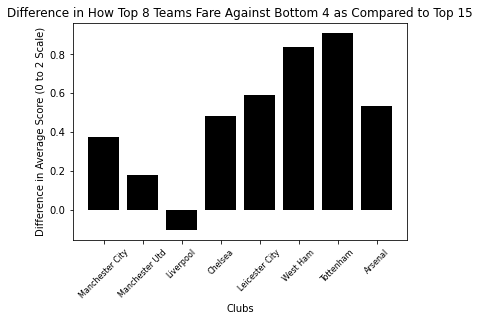

In [6]:
scorest = np.transpose(scores)
val = []
for a in range(8):
    val.append(((np.sum(scorest[a][16:])/4)-np.sum(scorest[a][0:15])/14))
    
plt.bar(names2[0:8], val, color ='black',
        width = 0.8)
 
plt.xlabel("Clubs")
plt.ylabel("Difference in Average Score (0 to 2 Scale)")
plt.title("Difference in How Top 8 Teams Fare Against Bottom 4 as Compared to Top 15")
plt.xticks(rotation=45,fontsize = 8)
plt.show()
